## Data Understanding

### from YELP Dataset on Kaggle


#### Builiding an initial database with json files

There are several json files on data set from Yelp on Kaggle,
upload to mongodb with

>mongoimport

And build some indexs on the mongodb with

> db.review.createIndex({business_id:1})

First of all import necessary libraries

In [79]:
import pymongo
import pandas as pd

In [80]:
mc = pymongo.MongoClient()
db = mc['yelp']

Shape of 'Business' and 'Review' Collection

In [81]:
business_coll = db['business']
review_coll = db['review']

In [82]:
business_coll.count_documents({})

192609

In [83]:
cur = business_coll.find({})
next(cur)

{'_id': ObjectId('5ced65b1ba8666cdc2af7fa8'),
 'business_id': 'xvX2CttrVhyG2z1dFg_0xw',
 'name': 'Farmers Insurance - Paul Lorenz',
 'address': '15655 W Roosevelt St, Ste 237',
 'city': 'Goodyear',
 'state': 'AZ',
 'postal_code': '85338',
 'latitude': 33.4556129678,
 'longitude': -112.3955963552,
 'stars': 5.0,
 'review_count': 3,
 'is_open': 1,
 'attributes': None,
 'categories': 'Insurance, Financial Services',
 'hours': {'Monday': '8:0-17:0',
  'Tuesday': '8:0-17:0',
  'Wednesday': '8:0-17:0',
  'Thursday': '8:0-17:0',
  'Friday': '8:0-17:0'}}

In [84]:
cities = business_coll.find({}).distinct("city")

In [85]:
len(cities)

1204

In [86]:
states = business_coll.find({}).distinct("state")

In [87]:
print(states)

['AZ', 'ON', 'NC', 'AB', 'NV', 'OH', 'PA', 'QC', 'WI', 'IL', 'NY', 'SC', 'TX', 'UT', 'NM', 'FL', 'CA', 'VA', 'BAS', 'NE', 'AK', 'XGM', 'WA', 'XWY', 'CON', 'BC', 'GA', 'VT', 'CT', 'AL', 'DUR', 'TN', 'NJ', 'AR', 'XGL', 'DOW']


In [88]:
vegas = business_coll.find({'city':'Las Vegas'})

In [89]:
len(list(vegas))

29370

In [90]:
cur = business_coll.find({})

In [91]:
restuants_vegas = business_coll.find({'categories':{"$regex": u"Restaurants"}, 'city':'Las Vegas'})
df = pd.DataFrame(list(restuants_vegas))

In [92]:
df.head()

,_id,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,5ced65b1ba8666cdc2af7fc0,6055 E Lake Mead Blvd,"{'BikeParking': 'True', 'BusinessParking': '{'...",tstimHoMcYbkSC4eBA1wEg,"Mexican, Restaurants, Patisserie/Cake Shop, Fo...",Las Vegas,"{'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...",1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV
1,5ced65b1ba8666cdc2af7fc5,"1775 E Tropicana Ave, Ste 29","{'OutdoorSeating': 'False', 'BusinessAcceptsCr...",PZ-LZzSlhSe9utkQYU8pFg,"Restaurants, Italian",Las Vegas,None,0,36.100016,-115.128529,Carluccio's Tivoli Gardens,89119,40,4.0,NV
2,5ced65b1ba8666cdc2af7ff2,6125 Spring Mountain Rd,"{'RestaurantsPriceRange2': '1', 'Ambience': '{...",kANF0dbeoW34s2vwh6Umfw,"Fast Food, Food, Restaurants, Ice Cream & Froz...",Las Vegas,None,0,36.125031,-115.225620,Dairy Queen,89146,33,2.0,NV
3,5ced65b1ba8666cdc2af8015,4343 N Rancho Dr,None,X8mtoSxY8whtmbDlj0D3Aw,"Restaurants, Chinese",Las Vegas,None,1,36.238596,-115.233331,Imperial Asian Buffet,89030,4,2.0,NV
4,5ced65b1ba8666cdc2af8033,"Artisan Hotel, 1501 W Sahara Ave","{'RestaurantsAttire': ''dressy'', 'Corkage': '...",bJP4l_BGq2CudEu0m-wNjg,"Restaurants, Pizza, Italian, American (New)",Las Vegas,"{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",0,36.143672,-115.169792,Artisan Fine Dining Room,89102,3,2.0,NV


In [93]:
review_coll = db['review']

In [94]:
review_coll.count_documents({})

6685900

In [95]:
cur = review_coll.find({})
next(cur)

{'_id': ObjectId('5ced66f9ba8666cdc2b7f848'),
 'review_id': '2TzJjDVDEuAW6MR5Vuc1ug',
 'user_id': 'n6-Gk65cPZL6Uz8qRm3NYw',
 'business_id': 'WTqjgwHlXbSFevF32_DJVw',
 'stars': 5.0,
 'useful': 3,
 'funny': 0,
 'cool': 0,
 'text': "I have to say that this office really has it together, they are so organized and friendly!  Dr. J. Phillipp is a great dentist, very friendly and professional.  The dental assistants that helped in my procedure were amazing, Jewel and Bailey helped me to feel comfortable!  I don't have dental insurance, but they have this insurance through their office you can purchase for $80 something a year and this gave me 25% off all of my dental work, plus they helped me get signed up for care credit which I knew nothing about before this visit!  I highly recommend this office for the nice synergy the whole office has!",
 'date': '2016-11-09 20:09:03'}

Make an review_dataframe

In [96]:
nv_cur = coll.find({'categories':{"$regex": u"Restaurants"}, 'state':'NV'})

review_list = []
count = 0
for doc in nv_cur:
    review_cur = review_coll.find({
        'business_id': doc['business_id']
    })
    count +=1
    
    for review in review_cur:
        review_list.append({**doc, **review})
        
    if count == 10:
        break

In [97]:
review_df = pd.DataFrame(review_list)
review_df[['name', 'review_count', 'is_open', 'stars', 'text', 'date']].head()

,name,review_count,is_open,stars,text,date
0,Maria's Mexican Restaurant & Bakery,184,1,4.0,We found out about this gem from The Man's co-...,2014-01-17 00:59:36
1,Maria's Mexican Restaurant & Bakery,184,1,3.0,"The ""chips"" are a fried corn tortilla which we...",2014-08-24 21:52:27
2,Maria's Mexican Restaurant & Bakery,184,1,4.0,The pollo mole is well worth the trip out here...,2011-09-26 01:53:09
3,Maria's Mexican Restaurant & Bakery,184,1,3.0,I've ordered Caldo de Rez from here twice and ...,2017-03-27 21:03:02
4,Maria's Mexican Restaurant & Bakery,184,1,5.0,My boyfriend doesn't like Mexican food yet he ...,2014-02-06 03:59:50


#### Let's check the stars

In [117]:
stars = review_coll.find({}).distinct("stars")
sorted(stars)

[1.0, 2.0, 3.0, 4.0, 5.0]

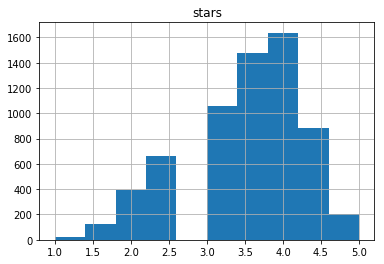

In [99]:
df.hist('stars');

In [100]:
cur = business_coll.find({
    'city': 'Las Vegas'
})

for i, doc in enumerate(cur):
    review_cur = review_coll.find({
        'business_id': doc['business_id']
    })
    stars = 0
    counts = 0
    for review in review_cur:
        stars += review['stars']
        counts += 1

    print(doc['stars'], stars/counts)
    
    if i == 10:
        break

3.5 3.6666666666666665
4.5 4.421052631578948
4.0 3.890909090909091
5.0 4.75
5.0 4.761904761904762
4.5 4.301587301587301
4.5 4.37037037037037
3.5 3.289473684210526
4.0 4.097560975609756
1.5 1.4736842105263157
5.0 5.0


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction import stop_words


In [102]:
# set train & test variables
train_features, test_features, train_labels, test_labels = train_test_split(review_df['text'], 
                                                                            review_df['stars'], 
                                                                            test_size=0.2, 
                                                                            random_state=42)


In [103]:
NGRAM_RANGE = (1, 1)

TOP_K = 2000
STOP_WORDS = 'english'
TOKEN_MODE = 'word'
MIN_DOCUMENT_FREQUENCY = 2

In [104]:
kwargs = {
            'ngram_range': NGRAM_RANGE,
            'stop_words': STOP_WORDS,
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': TOKEN_MODE,
            'min_df': MIN_DOCUMENT_FREQUENCY,
    }
vectorizer = TfidfVectorizer(**kwargs)

In [105]:
x_train = vectorizer.fit_transform(train_features)


/Users/teo/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1577: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


In [106]:
model = LogisticRegression()

In [107]:
model.fit(x_train, train_labels)

/Users/teo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/teo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
x_test = vectorizer.transform(test_features)

In [125]:
pred = model.predict(x_test)

In [134]:
count = 0
total = 0

for i, value in enumerate(test_labels):
    if value == pred[i]:
        count += 1
    total = i+1
        
print(count / total)

0.5416666666666666


In [135]:
test_df = pd.DataFrame(pred)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bb95b00>]],
      dtype=object)

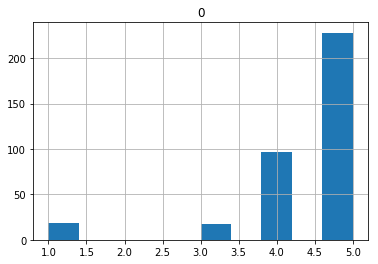

In [136]:
test_df.hist()

In [143]:
len(test_df[test_df[0] == 5]) / len(test_df)

0.6333333333333333

In [146]:
len(review_df[review_df['stars'] == 4]) / len(review_df)

0.25806451612903225

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f20cda0>]],
      dtype=object)

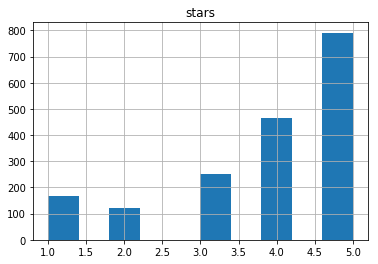

In [149]:
review_df.hist('stars')